In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
def deriv(t, n_initial, params):
    n1 = n_initial[0]
    n2 = n_initial[1]
    n3 = n_initial[2]
    
    B_13 = params[0]
    B_31 = params[1]
    gamma_31 = params[2]
    gamma_32 = params[3]
    Gamma_0 = params[4]
    N1 = params[5]
    N2 = params[6]
    


    n1dot = -n1*(B_13 + Gamma_0) + n3*(B_31 + gamma_31) + N1*Gamma_0
    n2dot = Gamma_0*(-n2 + N2) + n3*gamma_32
    n3dot = n1*B_13 - n3*(B_31 + gamma_32 + gamma_31 + Gamma_0)

    return n1dot, n2dot, n3dot

In [15]:
# Initial and final times.
t0, tf = 0, 500
# Initial conditions: [X] = 1; [Y] = [Z] = 0.
N_V = 1
N1 = 3/8 * N_V
N2 = 5/8 * N_V
y0 = (N1, N2, 0)
# Solve, using a method resilient to stiff ODEs.
soln = solve_ivp(deriv, (t0, tf), y0, method='Radau', args=([0.2, 0.2, 0.7, 0.3, 0.01, N1, N2],))
print(soln.nfev, 'evaluations required.')

149 evaluations required.


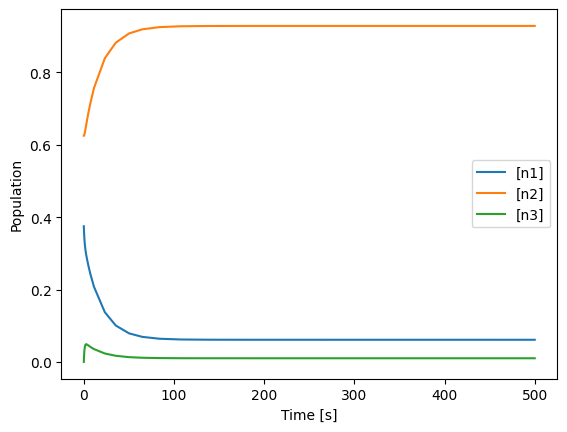

In [17]:

plt.plot(soln.t, soln.y[0], label='[n1]')
plt.plot(soln.t, soln.y[1], label='[n2]')
plt.plot(soln.t, soln.y[2], label='[n3]')
plt.xlabel('Time [s]')
plt.ylabel('Population')
plt.legend()
plt.show()
